In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_excel('Data_Train.xlsx')
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Spilting Date_of_Journey into Dates,Months and Year and dropping Date_of_Journey column

In [9]:
s=df['Date_of_Journey'].str.split(pat='/',expand = True)
s

,0,1,2
0,24,03,2019
1,1,05,2019
2,9,06,2019
3,12,05,2019
4,01,03,2019
...,...,...,...
10678,9,04,2019
10679,27,04,2019
10680,27,04,2019
10681,01,03,2019


In [10]:
df['Date'] = s[0]
df['Month'] = s[1]
df['Year'] = s[2]
df = df.drop('Date_of_Journey',axis=1)
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,04,2019
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,04,2019
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,04,2019
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,01,03,2019


Now we need to separate Arrival_Time column into Hour, Minute and Arriving Date

In [11]:
t=df['Arrival_Time'].str.split(pat=' ',expand = True)
t

,0,1,2
0,01:10,22,Mar
1,13:15,None,None
2,04:25,10,Jun
3,23:30,None,None
4,21:35,None,None
...,...,...,...
10678,22:25,None,None
10679,23:20,None,None
10680,11:20,None,None
10681,14:10,None,None


Wherever its None, it means it arrived on the same day. Means it arrived on Departure date. So fill that None with departure date.

In [12]:
df['Arrival_date'] = t[1]

In [13]:
df['Arrival_date'] = df['Arrival_date'].fillna(df['Date'])

In [14]:
p = t[0].str.split(pat=':',expand = True)
p

,0,1
0,01,10
1,13,15
2,04,25
3,23,30
4,21,35
...,...,...
10678,22,25
10679,23,20
10680,11,20
10681,14,10


In [15]:
df['Hour_Arrival'] = p[0]
df['Minute_Arrival'] = p[1]

In [16]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_date,Hour_Arrival,Minute_Arrival
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019,22,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019,1,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019,10,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019,12,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019,01,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,04,2019,9,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,04,2019,27,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,04,2019,27,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,01,03,2019,01,14,10


                   Same process we need to repeat for Duration column

In [17]:
k = df['Duration'].str.split(pat=' ',expand = True)
k

,0,1
0,2h,50m
1,7h,25m
2,19h,None
3,5h,25m
4,4h,45m
...,...,...
10678,2h,30m
10679,2h,35m
10680,3h,None
10681,2h,40m


In [18]:
e = k[0].str.split(pat='h',expand = True)
e

,0,1
0,2,
1,7,
2,19,
3,5,
4,4,
...,...,...
10678,2,
10679,2,
10680,3,
10681,2,


In [19]:
d = k[1].str.split(pat='m',expand = True)
d

,0,1
0,50,
1,25,
2,None,None
3,25,
4,45,
...,...,...
10678,30,
10679,35,
10680,None,None
10681,40,


In [20]:
df['Duration_hour'] = e[0]
df['Duration_minute'] = d[0]

Wherever there is None value in Minute, we will fill it with 0.

In [21]:
df['Duration_minute'].fillna(0,inplace=True)

In [22]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_date,Hour_Arrival,Minute_Arrival,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019,22,01,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019,1,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019,10,04,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019,12,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019,01,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,04,2019,9,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,04,2019,27,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,04,2019,27,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,01,03,2019,01,14,10,2,40


In [23]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [24]:
df['Total_Stops'].replace('non-stop','0',inplace=True)

In [25]:
w = df['Total_Stops'].str.split(pat=' ',expand = True)
w

,0,1
0,0,None
1,2,stops
2,2,stops
3,1,stop
4,1,stop
...,...,...
10678,0,None
10679,0,None
10680,0,None
10681,0,None


In [26]:
df['Total_Stops'] = w[0]
df = df.drop('Duration',axis=1)
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_date,Hour_Arrival,Minute_Arrival,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,0,No info,3897,24,03,2019,22,01,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2,No info,7662,1,05,2019,1,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2,No info,13882,9,06,2019,10,04,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1,No info,6218,12,05,2019,12,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1,No info,13302,01,03,2019,01,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,0,No info,4107,9,04,2019,9,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,0,No info,4145,27,04,2019,27,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,0,No info,7229,27,04,2019,27,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,0,No info,12648,01,03,2019,01,14,10,2,40


In [27]:
f = df['Dep_Time'].str.split(pat=':',expand = True)
f

,0,1
0,22,20
1,05,50
2,09,25
3,18,05
4,16,50
...,...,...
10678,19,55
10679,20,45
10680,08,20
10681,11,30


In [28]:
df['Dep_hour'] = f[0]
df['Dep_min'] = f[1]
df = df.drop('Dep_Time',axis=1)
df

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_date,Hour_Arrival,Minute_Arrival,Duration_hour,Duration_minute,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,0,No info,3897,24,03,2019,22,01,10,2,50,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,2,No info,7662,1,05,2019,1,13,15,7,25,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,2,No info,13882,9,06,2019,10,04,25,19,0,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,1,No info,6218,12,05,2019,12,23,30,5,25,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,1,No info,13302,01,03,2019,01,21,35,4,45,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,0,No info,4107,9,04,2019,9,22,25,2,30,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,0,No info,4145,27,04,2019,27,23,20,2,35,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,0,No info,7229,27,04,2019,27,11,20,3,0,08,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,14:10,0,No info,12648,01,03,2019,01,14,10,2,40,11,30


In [29]:
df['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [30]:
df['Additional_Info'] = df['Additional_Info'].replace('No Info','No info')

In [31]:
df['Additional_Info'].value_counts()

No info                         8348
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [32]:
df.isna().sum()

Airline            0
Source             0
Destination        0
Route              1
Arrival_Time       0
Total_Stops        1
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
Arrival_date       0
Hour_Arrival       0
Minute_Arrival     0
Duration_hour      0
Duration_minute    0
Dep_hour           0
Dep_min            0
dtype: int64

In [33]:
df = df.dropna()

In [34]:
df.isna().sum()

Airline            0
Source             0
Destination        0
Route              0
Arrival_Time       0
Total_Stops        0
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
Arrival_date       0
Hour_Arrival       0
Minute_Arrival     0
Duration_hour      0
Duration_minute    0
Dep_hour           0
Dep_min            0
dtype: int64

In [35]:
df = df.drop('Arrival_Time',axis=1)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Total_Stops      10682 non-null  object
 5   Additional_Info  10682 non-null  object
 6   Price            10682 non-null  int64 
 7   Date             10682 non-null  object
 8   Month            10682 non-null  object
 9   Year             10682 non-null  object
 10  Arrival_date     10682 non-null  object
 11  Hour_Arrival     10682 non-null  object
 12  Minute_Arrival   10682 non-null  object
 13  Duration_hour    10682 non-null  object
 14  Duration_minute  10682 non-null  object
 15  Dep_hour         10682 non-null  object
 16  Dep_min          10682 non-null  object
dtypes: int64(1), object(16)
memory 

Changing numerical column from object to int

In [37]:
df.Total_Stops = df.Total_Stops.astype('int64')
df.Date = df.Date.astype('int64')
df.Month = df.Month.astype('int64')
df.Year = df.Year.astype('int64')
df.Arrival_date = df.Arrival_date.astype('int64')
df.Hour_Arrival = df.Hour_Arrival.astype('int64')
df.Minute_Arrival = df.Minute_Arrival.astype('int64')
df.Duration_hour = df.Duration_hour.astype('int64')
df.Duration_minute = df.Duration_minute.astype('int64')
df.Dep_hour = df.Dep_hour.astype('int64')
df.Dep_min = df.Dep_min.astype('int64')

ValueError: invalid literal for int() with base 10: '5m'

In [40]:
df[df['Duration_hour']== '5m']

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_date,Hour_Arrival,Minute_Arrival,Duration_hour,Duration_minute,Dep_hour,Dep_min
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,2,No info,17327,6,3,2019,6,16,55,5m,0,16,50


In [41]:
df.drop(index=6474,inplace=True,axis=0)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10681 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10681 non-null  object
 1   Source           10681 non-null  object
 2   Destination      10681 non-null  object
 3   Route            10681 non-null  object
 4   Total_Stops      10681 non-null  int64 
 5   Additional_Info  10681 non-null  object
 6   Price            10681 non-null  int64 
 7   Date             10681 non-null  int64 
 8   Month            10681 non-null  int64 
 9   Year             10681 non-null  int64 
 10  Arrival_date     10681 non-null  int64 
 11  Hour_Arrival     10681 non-null  int64 
 12  Minute_Arrival   10681 non-null  int64 
 13  Duration_hour    10681 non-null  object
 14  Duration_minute  10681 non-null  object
 15  Dep_hour         10681 non-null  object
 16  Dep_min          10681 non-null  object
dtypes: int64(8), object(9)
memory u

In [43]:
df.Duration_hour = df.Duration_hour.astype('int64')
df.Duration_minute = df.Duration_minute.astype('int64')
df.Dep_hour = df.Dep_hour.astype('int64')
df.Dep_min = df.Dep_min.astype('int64')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10681 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10681 non-null  object
 1   Source           10681 non-null  object
 2   Destination      10681 non-null  object
 3   Route            10681 non-null  object
 4   Total_Stops      10681 non-null  int64 
 5   Additional_Info  10681 non-null  object
 6   Price            10681 non-null  int64 
 7   Date             10681 non-null  int64 
 8   Month            10681 non-null  int64 
 9   Year             10681 non-null  int64 
 10  Arrival_date     10681 non-null  int64 
 11  Hour_Arrival     10681 non-null  int64 
 12  Minute_Arrival   10681 non-null  int64 
 13  Duration_hour    10681 non-null  int64 
 14  Duration_minute  10681 non-null  int64 
 15  Dep_hour         10681 non-null  int64 
 16  Dep_min          10681 non-null  int64 
dtypes: int64(12), object(5)
memory 

In [45]:
df.shape

(10681, 17)

In [46]:
cat = ['Airline','Source','Destination','Route','Additional_Info']

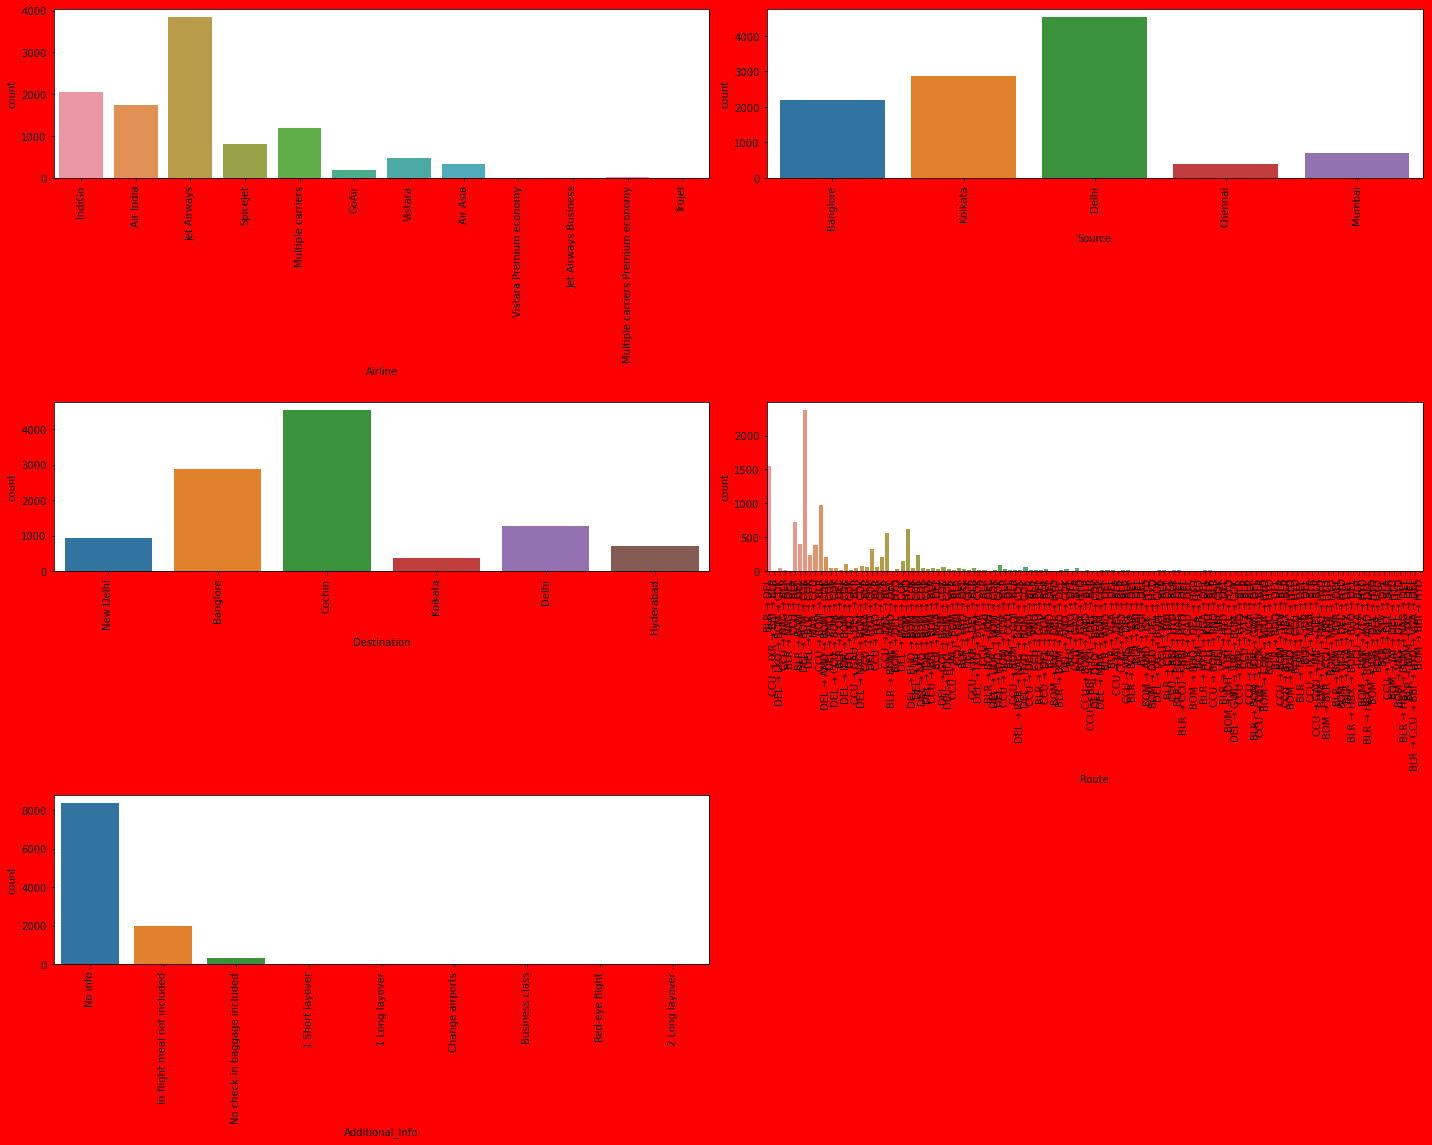

In [47]:
plt.figure(figsize=(20,16),facecolor='red')
plotnumber = 1
for i in cat :
    if plotnumber <= 6:
        ax = plt.subplot(3,2,plotnumber)
        sns.countplot(df[i])
        plt.xticks(rotation=90)
        
    plotnumber += 1  
    
plt.tight_layout()

*Counts for Jet Airways,Indigo and Air India is higher and counts of Multiple carriers Premium economy,Jet Airways Business, Vistara Premium economy and Trujet is quite low.
*Maximum Flights take off from Delhi and very few take off from chennai
*Maximum flights lands in Cochin and very few lands in kolkatta.
*Count of maximum row is No Info
*Routes of maximum flights is DEL → BOM → COK,BLR → DEL,CCU → BOM → BLR,CCU → BLR,BOM → HYD and very few flights operate in route CCU → VTZ → BLR,CCU → IXZ → MAA → BLR,BOM → COK → MAA → HYD,BOM → CCU → HYD, BOM → BBI → HYD

In [48]:
df['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [49]:
num = ['Total_Stops','Date','Month','Arrival_date','Hour_Arrival','Minute_Arrival','Duration_hour','Duration_minute','Dep_hour'
      ,'Dep_min']

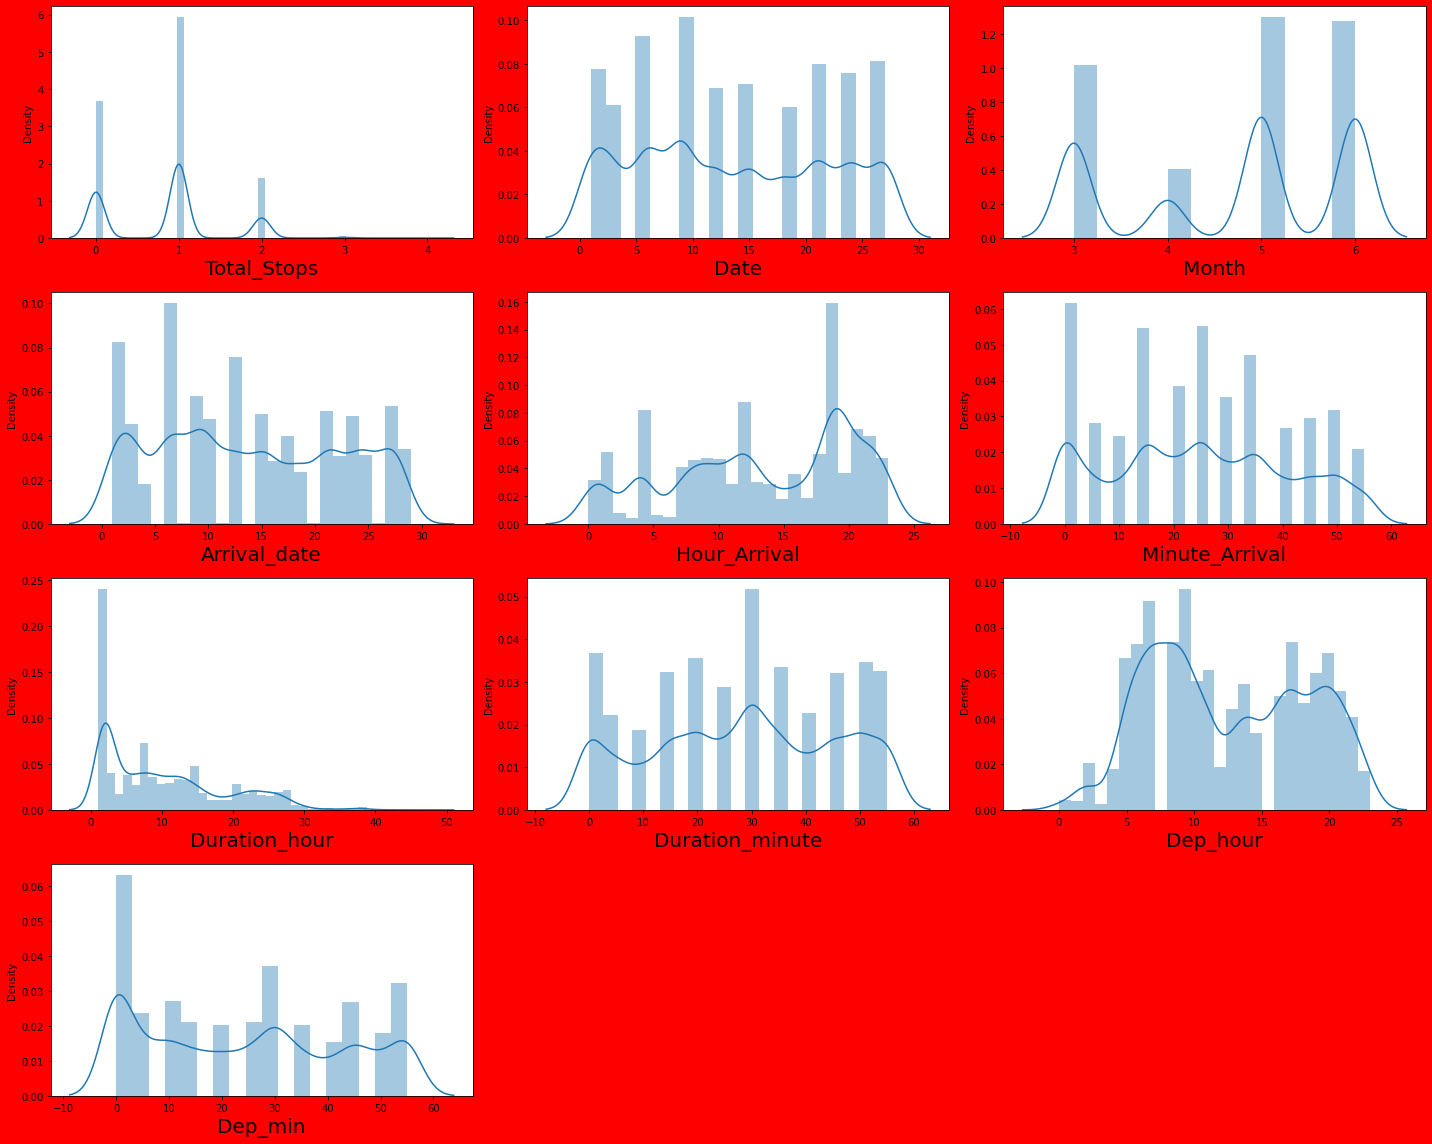

In [50]:
plt.figure(figsize=(20,16),facecolor='red')
plotnumber = 1
for i in num:
    if plotnumber <= 11:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=20)
        
    plotnumber += 1  
    
plt.tight_layout()

*Majority of flights have 1 stop and flights with 3 and 4 stops are very rare.
*For Dates distribution is almost smilar
*May and June have higher, people travel higher in this month, few people travel in April
*For Arrival dates, data is unifor,mly distributed and majority of flights lands on same day.
*Hour Arrival:Majority of flights reach destination in evening 16:00 -22:00
*Arrival Minute:Uniformly distributed
*Duration_hour: Maximum flights reach destination within 2-3 hours,some flights reach destination in 20-40 hours beacuse of more number of stops.
*Duration_minute:Uniformly distributed
*Dep_hour:Counts of flights during 6-10 Am and 16-22 PM is high. 

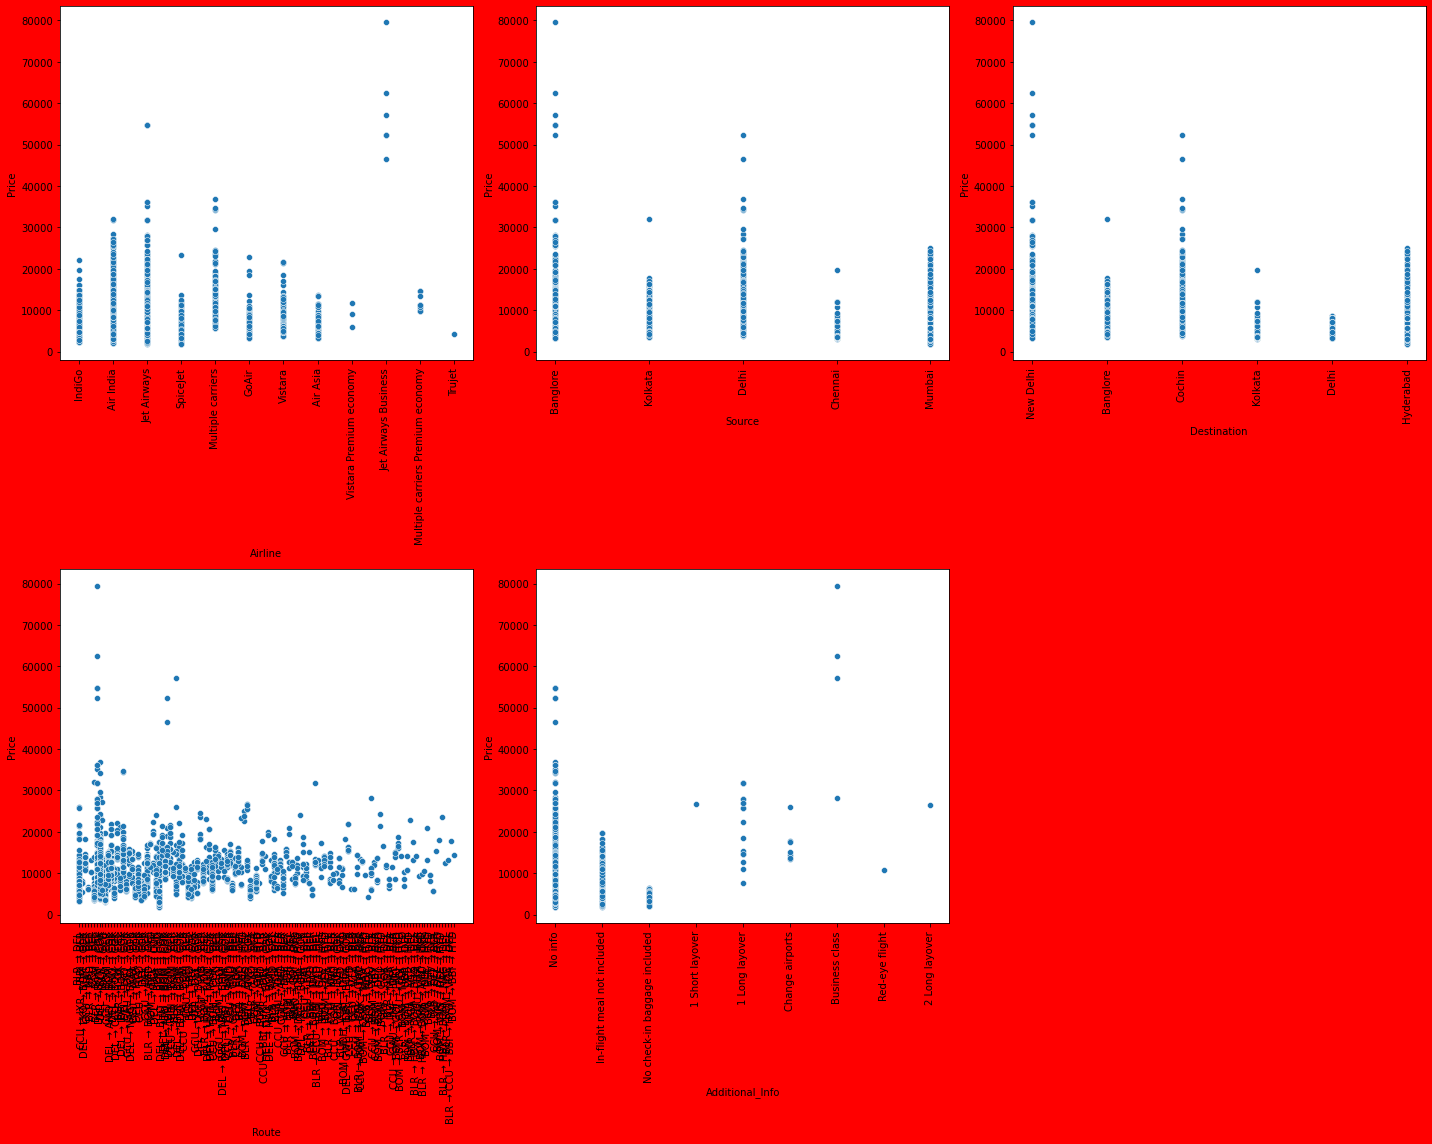

In [51]:
plt.figure(figsize=(20,16),facecolor='red')
plotnumber = 1
for h in cat:
    if plotnumber <= 6:
        ax = plt.subplot(2,3,plotnumber)
        sns.scatterplot(x=df[h],y=df.Price)
        plt.xticks(rotation=90)
        
    plotnumber += 1  
    
plt.tight_layout()

*All flights have price range b/w Rs 2500-Rs 50000. Only Jet airways has price b/w Rs 50k-80k.
*All the high cost flights departs from Bangalore and All the hih cost flights lands in New dElhi


In [52]:
df = df.drop('Year',axis=1)

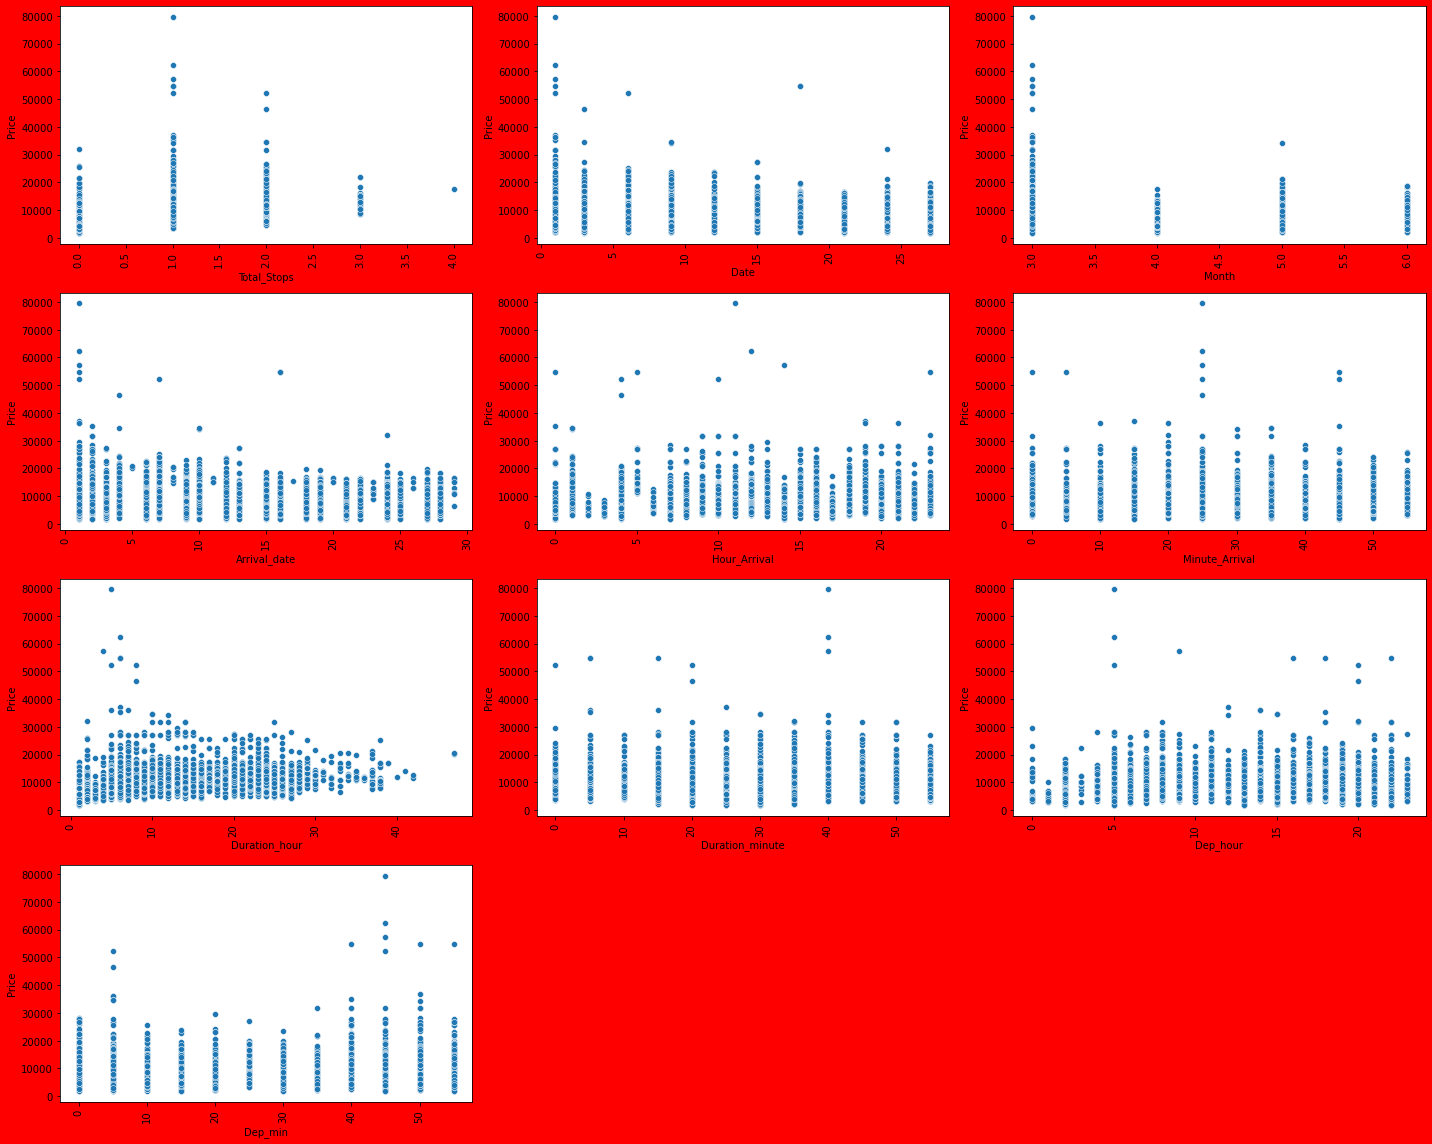

In [53]:
plt.figure(figsize=(20,16),facecolor='red')
plotnumber = 1
for z in num:
    if plotnumber <= 10:
        ax = plt.subplot(4,3,plotnumber)
        sns.scatterplot(x=df[z],y=df.Price)
        plt.xticks(rotation=90)
        
    plotnumber += 1  
    
plt.tight_layout()

*As no of stops increases price decreases and its in range of Rs 8000- Rs 20000.
*First week of month has higher prices but date increases price lies in range Rs 2500-Rs 20000
*Month of the march has higher price, other than that price lies in range of Rs 2500-Rs 18000
*With increase in Duration hour, no of flights decreases.
Minute_Arrival,Duration_minute,Dep_min:These column have hardly any impact on Prices.So we will drop them

In [54]:
df = df.drop(['Minute_Arrival','Duration_minute','Dep_min'],axis=1)

In [55]:
nm = ['Total_Stops','Date','Month','Arrival_date','Hour_Arrival','Duration_hour','Dep_hour','Price']

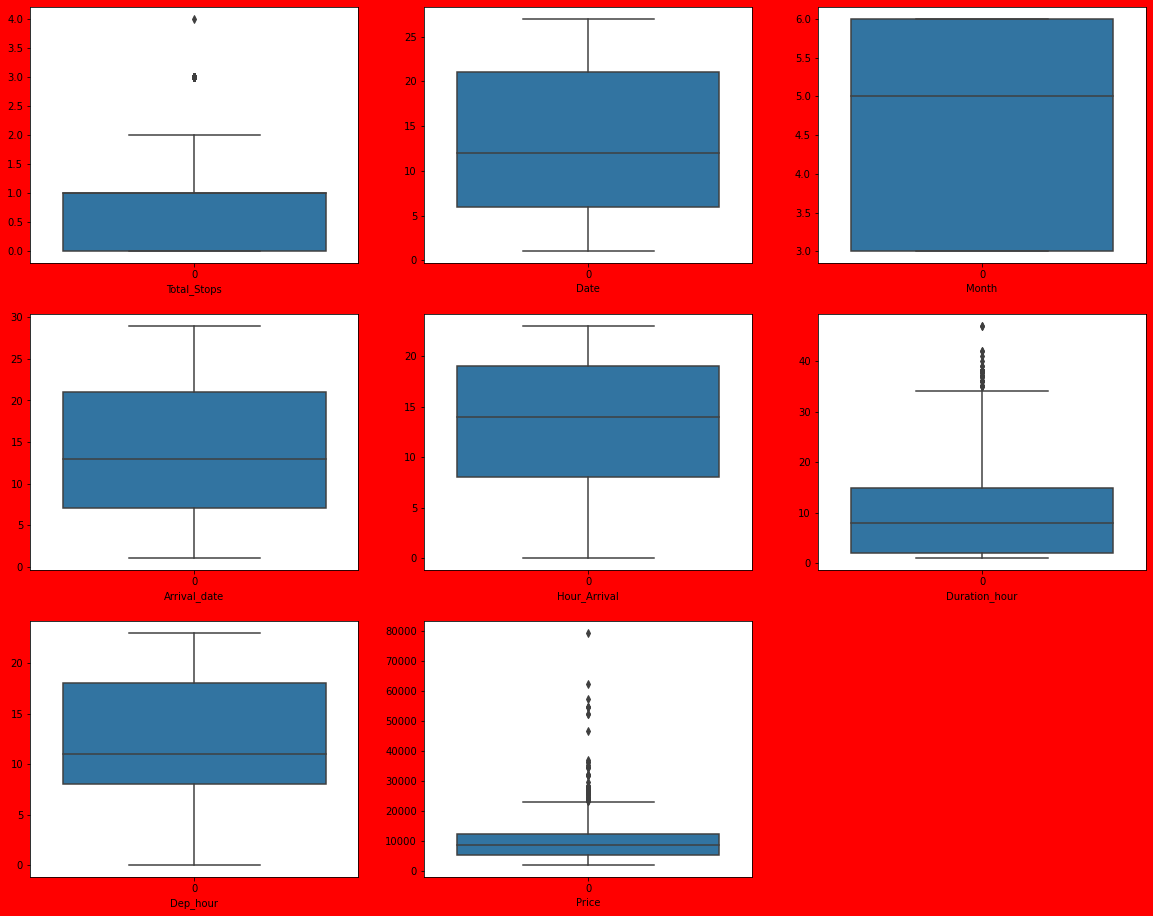

In [56]:
plt.figure(figsize=(20,16),facecolor='red')
graph = 1
for m in nm:
    if graph <= 9:
        ax = plt.subplot(3,3,graph)
        sns.boxplot(data= df[m])
        plt.xlabel(m)
    
        
    graph += 1  
    
plt.show()

*Total_Stops, Duration_hour and Prices have outliers. We will not remove outliers from these since price is impacted by these variables.

In [57]:
df.skew()

Total_Stops      0.317224
Price            1.813100
Date             0.117998
Month           -0.387625
Arrival_date     0.119494
Hour_Arrival    -0.370033
Duration_hour    0.851156
Dep_hour         0.113075
dtype: float64

+/- 0.5 skewness is fine. So we need to treat Duration_hour column

In [58]:
df.Duration_hour = np.log(df.Duration_hour)

In [59]:
df.Duration_hour.skew()

-0.2659940694368634

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10681 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10681 non-null  object 
 1   Source           10681 non-null  object 
 2   Destination      10681 non-null  object 
 3   Route            10681 non-null  object 
 4   Total_Stops      10681 non-null  int64  
 5   Additional_Info  10681 non-null  object 
 6   Price            10681 non-null  int64  
 7   Date             10681 non-null  int64  
 8   Month            10681 non-null  int64  
 9   Arrival_date     10681 non-null  int64  
 10  Hour_Arrival     10681 non-null  int64  
 11  Duration_hour    10681 non-null  float64
 12  Dep_hour         10681 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.4+ MB


In [61]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

In [62]:
for t in df.columns:
    if df[t].dtypes == 'object':
        print(t)
        df[t] = lab_enc.fit_transform(df[t])

Airline
Source
Destination
Route
Additional_Info


In [63]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Arrival_date,Hour_Arrival,Duration_hour,Dep_hour
0,3,0,5,18,0,7,3897,24,3,22,1,0.693147,22
1,1,3,0,84,2,7,7662,1,5,1,13,1.945910,5
2,4,2,1,118,2,7,13882,9,6,10,4,2.944439,9
3,3,3,0,91,1,7,6218,12,5,12,23,1.609438,18
4,3,0,5,29,1,7,13302,1,3,1,21,1.386294,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,0,7,4107,9,4,9,22,0.693147,19
10679,1,3,0,64,0,7,4145,27,4,27,23,0.693147,20
10680,4,0,2,18,0,7,7229,27,4,27,11,1.098612,8
10681,10,0,5,18,0,7,12648,1,3,1,14,0.693147,11


<AxesSubplot:>

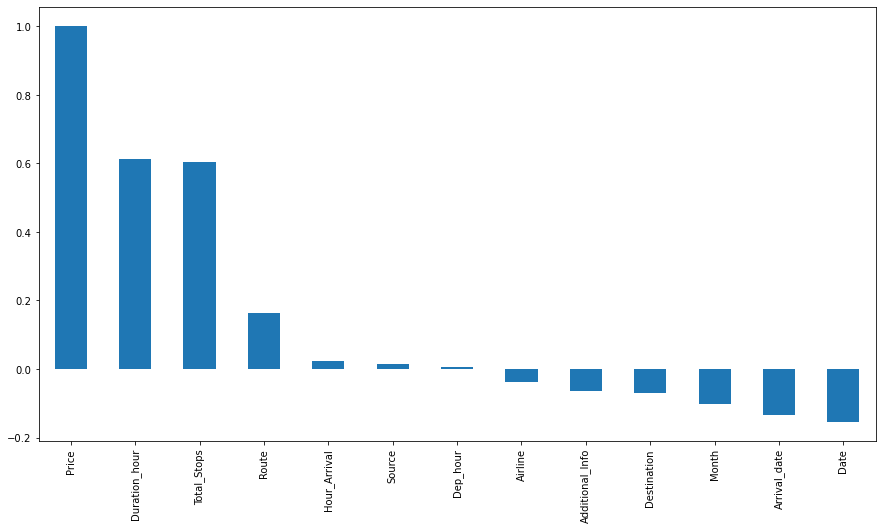

In [64]:
plt.figure(figsize=(15,8))
df.corr()['Price'].sort_values(ascending = False).plot(kind='bar')

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
scaler = StandardScaler()

In [67]:
X = df.drop('Price',axis=1)
y = df.Price

In [68]:
X_scaler = scaler.fit_transform(X)

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X_scaler,y,test_size=0.25,random_state=355)

In [71]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [72]:
def print_score(clf,X_train,X_test,y_train,y_test,train=True):
    if train:
        y_pred = clf.predict(X_train)
        print("\n ===Train result===")
        print(f"r2_score:{r2_score(y_train,y_pred)*100:.2f}%")
    elif train==False:
        pred = clf.predict(X_test)
        print("\n ===Test result===")
        print(f"r2_score:{r2_score(y_test,pred)*100:.2f}%")
        print('\n \n Mean Absolute Error is',mean_absolute_error(y_test,pred))
        print('\n \n Mean Squared Error is',mean_squared_error(y_test,pred))
        print('\n \n Root Mean Squared Error is',np.sqrt(mean_squared_error(y_test,pred)))

In [73]:
svr = SVR()
svr.fit(X_train,y_train)
print_score(svr,X_train,X_test,y_train,y_test,train=True)
print_score(svr,X_train,X_test,y_train,y_test,train=False)


 ===Train result===
r2_score:4.38%

 ===Test result===
r2_score:4.57%

 
 Mean Absolute Error is 3397.0368969617693

 
 Mean Squared Error is 20768157.128620755

 
 Root Mean Squared Error is 4557.20935755872


In [74]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
print_score(knn,X_train,X_test,y_train,y_test,train=True)
print_score(knn,X_train,X_test,y_train,y_test,train=False)


 ===Train result===
r2_score:84.61%

 ===Test result===
r2_score:74.67%

 
 Mean Absolute Error is 1289.4008236615502

 
 Mean Squared Error is 5511621.129524523

 
 Root Mean Squared Error is 2347.6842056640676


In [75]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
print_score(dt,X_train,X_test,y_train,y_test,train=True)
print_score(dt,X_train,X_test,y_train,y_test,train=False)


 ===Train result===
r2_score:99.06%

 ===Test result===
r2_score:79.24%

 
 Mean Absolute Error is 789.2135904155747

 
 Mean Squared Error is 4518752.496724074

 
 Root Mean Squared Error is 2125.7357542093687


In [76]:
lr = LinearRegression()
lr.fit(X_train,y_train)
print_score(lr,X_train,X_test,y_train,y_test,train=True)
print_score(lr,X_train,X_test,y_train,y_test,train=False)


 ===Train result===
r2_score:47.20%

 ===Test result===
r2_score:46.77%

 
 Mean Absolute Error is 2322.8357837562476

 
 Mean Squared Error is 11584136.716892662

 
 Root Mean Squared Error is 3403.5476663171125


In [77]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
print_score(rf,X_train,X_test,y_train,y_test,train=True)
print_score(rf,X_train,X_test,y_train,y_test,train=False)


 ===Train result===
r2_score:97.39%

 ===Test result===
r2_score:85.81%

 
 Mean Absolute Error is 718.9898131912495

 
 Mean Squared Error is 3089189.220788518

 
 Root Mean Squared Error is 1757.6089499056718


In [78]:
gbdt = GradientBoostingRegressor()
gbdt.fit(X_train,y_train)
print_score(gbdt,X_train,X_test,y_train,y_test,train=True)
print_score(gbdt,X_train,X_test,y_train,y_test,train=False)


 ===Train result===
r2_score:83.36%

 ===Test result===
r2_score:85.32%

 
 Mean Absolute Error is 1233.0927121122502

 
 Mean Squared Error is 3194533.2752236044

 
 Root Mean Squared Error is 1787.3257328264494


Random Forest Regressor better than all having accuracy of 86.00% but model is overfitting on train data.We will cross validate.

In [79]:
from sklearn.model_selection import cross_val_score

In [80]:
for i in range(2,9):
    cv = cross_val_score(rf,X_scaler,y,cv=i)
    print(rf,cv.mean())

RandomForestRegressor() 0.850317152088631
RandomForestRegressor() 0.8523914831270343
RandomForestRegressor() 0.8668421134989541
RandomForestRegressor() 0.8755635588433789
RandomForestRegressor() 0.8717103316173457
RandomForestRegressor() 0.8738220661748614
RandomForestRegressor() 0.8717434514758733


In [81]:
for i in range(2,9):
    cv = cross_val_score(gbdt,X_scaler,y,cv=i)
    print(gbdt,cv.mean())

GradientBoostingRegressor() 0.8189135750654648
GradientBoostingRegressor() 0.8212271865257522
GradientBoostingRegressor() 0.8270124285773861
GradientBoostingRegressor() 0.8270678718427071
GradientBoostingRegressor() 0.8214040712039079
GradientBoostingRegressor() 0.8233036943075452
GradientBoostingRegressor() 0.8259158909603421


Parameter tuning

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
grid_param = {'max_depth':[None,1,2,3],'min_samples_split':[2,4,10],'max_samples':[50,100,250,500,1000],
             'n_estimators':[10,30,50,70,100]}
grid = GridSearchCV(RandomForestRegressor(),param_grid=grid_param,cv=3)

In [84]:
grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 1, 2, 3],
                         'max_samples': [50, 100, 250, 500, 1000],
                         'min_samples_split': [2, 4, 10],
                         'n_estimators': [10, 30, 50, 70, 100]})

In [85]:
grid.best_params_

{'max_depth': None,
 'max_samples': 1000,
 'min_samples_split': 2,
 'n_estimators': 70}

In [86]:
rf = RandomForestRegressor(max_depth=None,min_samples_split=2,n_estimators=100,max_samples=1000)
rf.fit(X_train,y_train)
print_score(rf,X_train,X_test,y_train,y_test,train=True)
print_score(rf,X_train,X_test,y_train,y_test,train=False)


 ===Train result===
r2_score:86.45%

 ===Test result===
r2_score:81.43%

 
 Mean Absolute Error is 995.107500311993

 
 Mean Squared Error is 4041112.41240958

 
 Root Mean Squared Error is 2010.2518281075086


In [87]:
grid_param2 = {'alpha':[0.9,0.09,0.1],'max_depth':[3,4,5],'learning_rate':[0.1,0.01],'min_samples_split':[2,3,4],
               'min_samples_leaf':[1,2,3],
             'n_estimators':[100,50,10]}
grid = GridSearchCV(GradientBoostingRegressor(),param_grid=grid_param2,cv=3)

In [88]:
grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'alpha': [0.9, 0.09, 0.1],
                         'learning_rate': [0.1, 0.01], 'max_depth': [3, 4, 5],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 50, 10]})

In [89]:
grid.best_params_

{'alpha': 0.1,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [90]:
gbdt = GradientBoostingRegressor(alpha=0.9,max_depth=5,learning_rate=0.1,min_samples_split=2,n_estimators=100,min_samples_leaf=1)
gbdt.fit(X_train,y_train)
print_score(gbdt,X_train,X_test,y_train,y_test,train=True)
print_score(gbdt,X_train,X_test,y_train,y_test,train=False)


 ===Train result===
r2_score:91.40%

 ===Test result===
r2_score:88.77%

 
 Mean Absolute Error is 959.3251863780467

 
 Mean Squared Error is 2444351.0306293224

 
 Root Mean Squared Error is 1563.4420458172801


This is even better than RandomForest Regressor. Shows we have tune our model.

In [91]:
model = GradientBoostingRegressor(alpha=0.9,max_depth=5,learning_rate=0.1,min_samples_split=2,n_estimators=100,min_samples_leaf=1)

In [92]:
model.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=5)

In [93]:
import joblib

In [94]:
joblib.dump(model, 'flight_price.obj')

['flight_price.obj']

In [95]:
df_test = pd.read_excel('Test_set.xlsx')
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [96]:
a=df_test['Date_of_Journey'].str.split(pat='/',expand = True)
a

,0,1,2
0,6,06,2019
1,12,05,2019
2,21,05,2019
3,21,05,2019
4,24,06,2019
...,...,...,...
2666,6,06,2019
2667,27,03,2019
2668,6,03,2019
2669,6,03,2019


In [97]:
df_test['Date'] = a[0]
df_test['Month'] = a[1]
df_test['Year'] = a[2]
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month,Year
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,06,2019
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,05,2019
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,05,2019
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,05,2019
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,06,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,6,06,2019
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,27,03,2019
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,6,03,2019
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,6,03,2019


In [98]:
v=df_test['Arrival_Time'].str.split(pat=' ',expand = True)
v

,0,1,2
0,04:25,07,Jun
1,10:20,None,None
2,19:00,22,May
3,21:00,None,None
4,02:45,25,Jun
...,...,...,...
2666,20:25,07,Jun
2667,16:55,None,None
2668,04:25,07,Mar
2669,19:15,None,None


In [99]:
df_test['Arrival_date'] = v[1]

In [100]:
df_test['Arrival_date'] = df_test['Arrival_date'].fillna(df_test['Date'])

In [101]:
b = v[0].str.split(pat=':',expand = True)
b

,0,1
0,04,25
1,10,20
2,19,00
3,21,00
4,02,45
...,...,...
2666,20,25
2667,16,55
2668,04,25
2669,19,15


In [102]:
df_test['Hour_Arrival'] = b[0]
df_test['Minute_Arrival'] = b[1]

In [103]:
c = df_test['Duration'].str.split(pat=' ',expand = True)
c

,0,1
0,10h,55m
1,4h,None
2,23h,45m
3,13h,None
4,2h,50m
...,...,...
2666,23h,55m
2667,2h,35m
2668,6h,35m
2669,15h,15m


In [104]:
x = c[0].str.split(pat='h',expand = True)
x

,0,1
0,10,
1,4,
2,23,
3,13,
4,2,
...,...,...
2666,23,
2667,2,
2668,6,
2669,15,


In [105]:
d = c[1].str.split(pat='m',expand = True)
d

,0,1
0,55,
1,None,None
2,45,
3,None,None
4,50,
...,...,...
2666,55,
2667,35,
2668,35,
2669,15,


In [106]:
df_test['Duration_hour'] = x[0]
df_test['Duration_minute'] = d[0]

In [107]:
df_test['Duration_minute'].fillna(0,inplace=True)

In [108]:
df_test['Total_Stops'].replace('non-stop','0',inplace=True)

In [109]:
q = df_test['Total_Stops'].str.split(pat=' ',expand = True)
q

,0,1
0,1,stop
1,1,stop
2,1,stop
3,1,stop
4,0,None
...,...,...
2666,1,stop
2667,0,None
2668,1,stop
2669,1,stop


In [110]:
df_test['Total_Stops'] = q[0]
df_test = df_test.drop('Duration',axis=1)

In [111]:
j = df_test['Dep_Time'].str.split(pat=':',expand = True)
j

,0,1
0,17,30
1,06,20
2,19,15
3,08,00
4,23,55
...,...,...
2666,20,30
2667,14,20
2668,21,50
2669,04,00


In [112]:
df_test['Dep_hour'] = j[0]
df_test['Dep_min'] = j[1]
df_test = df_test.drop('Dep_Time',axis=1)

In [113]:
df_test['Additional_Info'].value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
1 Long layover                     1
Business class                     1
Change airports                    1
Name: Additional_Info, dtype: int64

In [114]:
df_test.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Arrival_Time       0
Total_Stops        0
Additional_Info    0
Date               0
Month              0
Year               0
Arrival_date       0
Hour_Arrival       0
Minute_Arrival     0
Duration_hour      0
Duration_minute    0
Dep_hour           0
Dep_min            0
dtype: int64

In [115]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Arrival_Time     2671 non-null   object
 6   Total_Stops      2671 non-null   object
 7   Additional_Info  2671 non-null   object
 8   Date             2671 non-null   object
 9   Month            2671 non-null   object
 10  Year             2671 non-null   object
 11  Arrival_date     2671 non-null   object
 12  Hour_Arrival     2671 non-null   object
 13  Minute_Arrival   2671 non-null   object
 14  Duration_hour    2671 non-null   object
 15  Duration_minute  2671 non-null   object
 16  Dep_hour         2671 non-null   object
 17  Dep_min          2671 non-null   

In [116]:
df_test.Total_Stops = df_test.Total_Stops.astype('int64')
df_test.Date = df_test.Date.astype('int64')
df_test.Month = df_test.Month.astype('int64')
df_test.Year = df_test.Year.astype('int64')
df_test.Arrival_date = df_test.Arrival_date.astype('int64')
df_test.Hour_Arrival = df_test.Hour_Arrival.astype('int64')
df_test.Minute_Arrival = df_test.Minute_Arrival.astype('int64')
df_test.Duration_hour = df_test.Duration_hour.astype('int64')
df_test.Duration_minute = df_test.Duration_minute.astype('int64')
df_test.Dep_hour = df_test.Dep_hour.astype('int64')
df_test.Dep_min = df_test.Dep_min.astype('int64')

ValueError: invalid literal for int() with base 10: '5m'

In [117]:
df_test[df_test['Duration_hour']== '5m']

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Date,Month,Year,Arrival_date,Hour_Arrival,Minute_Arrival,Duration_hour,Duration_minute,Dep_hour,Dep_min
2660,Air India,12/03/2019,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:55,2,No info,12,3,2019,12,16,55,5m,0,16,50


In [118]:
df_test.drop(index=2660,inplace=True,axis=0)

In [119]:
df_test.Duration_hour = df_test.Duration_hour.astype('int64')
df_test.Duration_minute = df_test.Duration_minute.astype('int64')
df_test.Dep_hour = df_test.Dep_hour.astype('int64')
df_test.Dep_min = df_test.Dep_min.astype('int64')

In [120]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2670 entries, 0 to 2670
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2670 non-null   object
 1   Date_of_Journey  2670 non-null   object
 2   Source           2670 non-null   object
 3   Destination      2670 non-null   object
 4   Route            2670 non-null   object
 5   Arrival_Time     2670 non-null   object
 6   Total_Stops      2670 non-null   int64 
 7   Additional_Info  2670 non-null   object
 8   Date             2670 non-null   int64 
 9   Month            2670 non-null   int64 
 10  Year             2670 non-null   int64 
 11  Arrival_date     2670 non-null   int64 
 12  Hour_Arrival     2670 non-null   int64 
 13  Minute_Arrival   2670 non-null   int64 
 14  Duration_hour    2670 non-null   int64 
 15  Duration_minute  2670 non-null   int64 
 16  Dep_hour         2670 non-null   int64 
 17  Dep_min          2670 non-null   

In [121]:
df_test = df_test.drop('Year',axis=1)

In [122]:
df_test = df_test.drop(['Minute_Arrival','Duration_minute','Dep_min'],axis=1)

In [123]:
df_test.skew()

Total_Stops      0.321839
Date             0.199380
Month           -0.404578
Arrival_date     0.199796
Hour_Arrival    -0.442742
Duration_hour    0.884521
Dep_hour         0.094352
dtype: float64

In [124]:
df_test.Duration_hour = np.log(df_test.Duration_hour)

In [125]:
df_test.skew()

Total_Stops      0.321839
Date             0.199380
Month           -0.404578
Arrival_date     0.199796
Hour_Arrival    -0.442742
Duration_hour   -0.297653
Dep_hour         0.094352
dtype: float64

In [126]:
from sklearn.preprocessing import LabelEncoder
la_enc = LabelEncoder()

In [127]:
for k in df_test.columns:
    if df_test[k].dtypes == 'object':
        print(k)
        df_test[k] = la_enc.fit_transform(df_test[k])

Airline
Date_of_Journey
Source
Destination
Route
Arrival_Time
Additional_Info


In [128]:
df_test = df_test.drop('Arrival_Time',axis=1)

In [129]:
df_test = df_test.drop('Date_of_Journey',axis=1)

In [130]:
df_test

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Date,Month,Arrival_date,Hour_Arrival,Duration_hour,Dep_hour
0,4,2,1,75,1,5,6,6,7,4,2.302585,17
1,3,3,0,64,1,5,12,5,12,10,1.386294,6
2,4,2,1,75,1,3,21,5,22,19,3.135494,19
3,6,2,1,75,1,5,21,5,21,21,2.564949,8
4,0,0,2,16,0,5,24,6,25,2,0.693147,23
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,50,1,5,6,6,7,20,3.135494,20
2667,3,3,0,42,0,5,27,3,27,16,0.693147,14
2668,4,2,1,75,1,5,6,3,7,4,1.791759,21
2669,1,2,1,75,1,5,6,3,6,19,2.708050,4


In [131]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Arrival_date,Hour_Arrival,Duration_hour,Dep_hour
0,3,0,5,18,0,7,3897,24,3,22,1,0.693147,22
1,1,3,0,84,2,7,7662,1,5,1,13,1.945910,5
2,4,2,1,118,2,7,13882,9,6,10,4,2.944439,9
3,3,3,0,91,1,7,6218,12,5,12,23,1.609438,18
4,3,0,5,29,1,7,13302,1,3,1,21,1.386294,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,0,7,4107,9,4,9,22,0.693147,19
10679,1,3,0,64,0,7,4145,27,4,27,23,0.693147,20
10680,4,0,2,18,0,7,7229,27,4,27,11,1.098612,8
10681,10,0,5,18,0,7,12648,1,3,1,14,0.693147,11


In [132]:
from sklearn.preprocessing import StandardScaler

In [133]:
scaler = StandardScaler()

In [134]:
testdata = scaler.fit_transform(df_test)

In [135]:
flight_price = joblib.load('flight_price.obj')

In [136]:
prices = flight_price.predict(testdata)

In [137]:
prices

array([14125.92032775,  5136.07979149, 11870.68265579, ...,
       17248.35365116, 13668.6544209 ,  9390.45208238])

In [138]:
prices_list = pd.DataFrame({'Prices':prices})
prices_list

,Prices
0,14125.920328
1,5136.079791
2,11870.682656
3,10164.189798
4,3911.516416
...,...
2665,8373.811356
2666,4783.012619
2667,17248.353651
2668,13668.654421
